### Cho bộ dữ liệu
X = [[1, 2], [2, 1], [3, 1], [4, 3]]
Y = [1, 0, 0, 1]

### Mạng lan truyền thẳng : hồi quy logistic
- Thông số:
+ 1 lớp ẩn độ rộng 3
+ hàm kích hoạt trên lớp ẩn và lớp đầu ra : sigmoid
+ tốc độ học : 0,1 
+ độ lớn của gradient
+ số lần lặp tiêu chuẩn: 1000
+ hàm mất mát: entropy

- Khởi tạo:
+ W(1) = [[1, 0, -2], [-1, 3, 2]]
+ b(1) = [4, 5, -3]
+ W(2) = [2, 0, -3]
+ b(2) = 1

In [93]:
import numpy  as np
import matplotlib.pyplot as plt

### Lan truyền xuôi

In [94]:
X = np.array([[1, 2],
              [2, 1],
              [3, 1],
              [4, 3]])
Y = np.array(([1],
              [0],
              [0],
              [1]))

In [95]:
W1 = np.array([[1, 0, -2],
               [-1, 3, 2]])

b1 = np.array(([4],
               [5],
               [-3]))

In [96]:
W2 = np.array(([2],
               [0],
               [-3]))

b2 = np.array(([1]))

### Lan truyền xuôi

In [97]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [98]:
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [99]:
Z1 = X.dot(W1) + b1.flatten()

In [100]:
H = sigmoid(Z1)
H

array([[9.52574127e-01, 9.99983299e-01, 2.68941421e-01],
       [9.93307149e-01, 9.99664650e-01, 6.69285092e-03],
       [9.97527377e-01, 9.99664650e-01, 9.11051194e-04],
       [9.93307149e-01, 9.99999168e-01, 6.69285092e-03]])

In [101]:
Z2 = H.dot(W2) + b2.flatten()
Z2

array([[2.09832399],
       [2.96653575],
       [2.9923216 ],
       [2.96653575]])

In [102]:
y_pred = sigmoid(Z2)
y_pred

array([[0.89074017],
       [0.95103922],
       [0.95222603],
       [0.95103922]])

In [103]:
J = (-Y * np.log(y_pred) - (1 - Y) * np.log(1 - y_pred)).mean()
J

np.float64(1.5559781614141208)

### Lan truyền ngược

In [104]:
J_Y_pred = 1 / 4 * (-Y / y_pred + (1-Y) / (1- y_pred))
J_Y_pred

array([[-0.28066546],
       [ 5.10612786],
       [ 5.23297568],
       [-0.26287034]])

In [105]:
gradient_J_Z2 = J_Y_pred * sigmoid_derivative(Z2)
gradient_J_Z2

array([[-0.02731496],
       [ 0.23775981],
       [ 0.23805651],
       [-0.01224019]])

In [106]:
gradient_J_H = gradient_J_Z2.dot(W2.T)
gradient_J_H

array([[-0.05462991,  0.        ,  0.08194487],
       [ 0.47551961,  0.        , -0.71327942],
       [ 0.47611302,  0.        , -0.71416953],
       [-0.02448039,  0.        ,  0.03672058]])

In [107]:
gradient_J_W2 = H.T.dot(gradient_J_Z2)
gradient_J_W2

array([[ 0.4354586 ],
       [ 0.43610206],
       [-0.00561987]])

In [108]:
gradient_J_b2 = gradient_J_Z2.sum(axis=0)   
gradient_J_b2

array([0.43626116])

In [109]:
gradient_J_Z1 = gradient_J_H * sigmoid_derivative(Z1)
gradient_J_Z1

array([[-0.002468  ,  0.        ,  0.01611134],
       [ 0.00316128,  0.        , -0.00474192],
       [ 0.00117434,  0.        , -0.00065005],
       [-0.00016275,  0.        ,  0.00024412]])

In [110]:
gradient_J_W1 = X.T.dot(gradient_J_Z1)
gradient_J_W1

array([[ 0.00672659,  0.        ,  0.00565382],
       [-0.00108862,  0.        ,  0.02756307]])

In [111]:
gradient_J_b1 = gradient_J_Z1.sum(axis=0)
gradient_J_b1

array([0.00170487, 0.        , 0.01096349])

In [112]:
np.linalg.norm(gradient_J_W1), np.linalg.norm(gradient_J_b1), np.linalg.norm(gradient_J_W2), np.linalg.norm(gradient_J_b2)

(np.float64(0.028950309059374405),
 np.float64(0.011095251965183585),
 np.float64(0.6163122495636858),
 np.float64(0.4362611620726446))

### Đưa vào vào while

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

X = np.array([[1, 2],
              [2, 1],
              [3, 1],
              [4, 3]])  # (4, 2)

Y = np.array([[1],
              [0],
              [0],
              [1]])  # (4, 1)

learning_rate = 0.1
tolerance = 1e-5
n_iter = 1000
step = 0

W1 = np.array([[1, 0, -2],
               [-1, 3, 2]])  # (2, 3)

b1 = np.array([[4, 5, -3]])  # (1, 3)

W2 = np.array([[2],
               [0],
               [-3]])  # (3, 1)

b2 = np.array([1])  # (1,)

history = []

while True:
    step += 1
    Z1 = X.dot(W1) + b1  # Kích thước: (4, 3)
    H = sigmoid(Z1)
    Z2 = H.dot(W2) + b2  # Kích thước: (4, 1)
    y_pred = sigmoid(Z2)

    # Tính toán hàm lỗi
    J = (-Y * np.log(y_pred) - (1 - Y) * np.log(1 - y_pred)).mean()

    # Lưu lại lịch sử giá trị hàm lỗi
    history.append(J)

    # Tính gradient
    J_Y_pred = -Y / y_pred + (1 - Y) / (1 - y_pred)
    
    gradient_J_Z2 = J_Y_pred * sigmoid_derivative(Z2)
    gradient_J_W2 = H.T.dot(gradient_J_Z2)
    gradient_J_b2 = gradient_J_Z2.sum(axis=0)
    gradient_J_H = gradient_J_Z2.dot(W2.T)
    gradient_J_Z1 = gradient_J_H * sigmoid_derivative(Z1)
    gradient_J_W1 = X.T.dot(gradient_J_Z1)
    gradient_J_b1 = gradient_J_Z1.sum(axis=0, keepdims=True)  # (1, 3)

    # Cập nhật tham số
    W1 = W1 - learning_rate * gradient_J_W1
    b1 = b1 - learning_rate * gradient_J_b1
    W2 = W2 - learning_rate * gradient_J_W2
    b2 = b2 - learning_rate * gradient_J_b2

    # Kiểm tra điều kiện dừng
    if (np.linalg.norm(gradient_J_W1) < tolerance and 
        np.linalg.norm(gradient_J_b1) < tolerance and 
        np.linalg.norm(gradient_J_W2) < tolerance and 
        np.linalg.norm(gradient_J_b2) < tolerance) or step >= n_iter:
        break

print(f"Training completed in {step} steps.")

Training completed in 1000 steps.


In [114]:
history

[np.float64(1.5559781614141208),
 np.float64(1.3364999961615098),
 np.float64(1.155619851972766),
 np.float64(1.0178698811575944),
 np.float64(0.9208079013053377),
 np.float64(0.856410733663191),
 np.float64(0.8150261588202155),
 np.float64(0.788485794019159),
 np.float64(0.7710848533502251),
 np.float64(0.7592374135753349),
 np.float64(0.7508012443972081),
 np.float64(0.7445176229791772),
 np.float64(0.7396431346323852),
 np.float64(0.7357301097769535),
 np.float64(0.732501041262322),
 np.float64(0.7297777575379346),
 np.float64(0.7274414203375926),
 np.float64(0.7254096757453725),
 np.float64(0.7236233609528993),
 np.float64(0.7220385828019824),
 np.float64(0.7206218617941126),
 np.float64(0.719347060612866),
 np.float64(0.718193376767065),
 np.float64(0.7171439873931721),
 np.float64(0.7161851057578621),
 np.float64(0.7153053057256838),
 np.float64(0.7144950259726548),
 np.float64(0.7137461982567278),
 np.float64(0.7130519635691083),
 np.float64(0.7124064519976515),
 np.float64(0.71

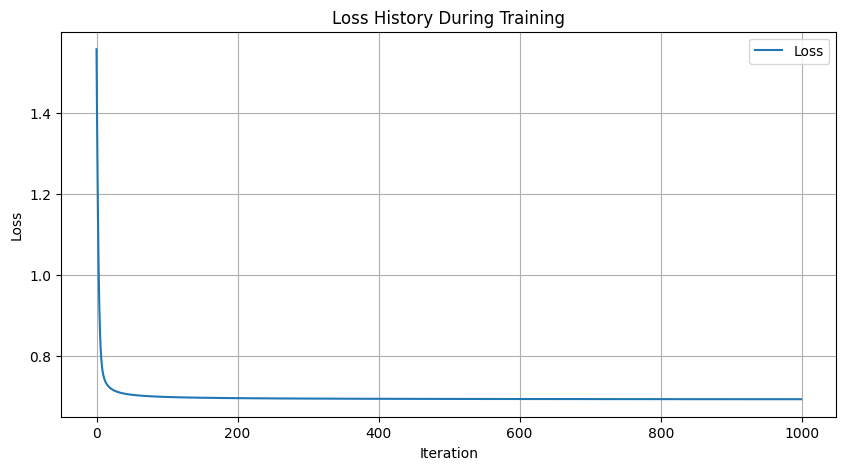

In [115]:
# Vẽ lịch sử hàm lỗi (Loss History)
plt.figure(figsize=(10, 5))
plt.plot(history, label="Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss History During Training")
plt.legend()
plt.grid(True)
plt.show()

In [118]:
b2

array([0.13352395])

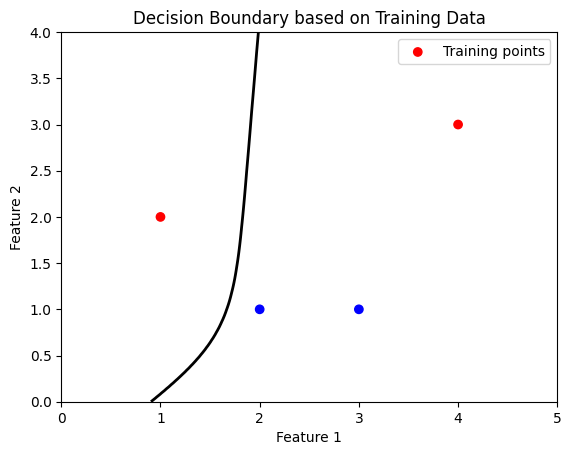

In [116]:
# Hàm dự đoán sigmoid
def predict(X):
    Z1 = X.dot(W1) + b1
    H = sigmoid(Z1)
    Z2 = H.dot(W2) + b2
    return sigmoid(Z2)

# Dự đoán cho tất cả các điểm huấn luyện
y_pred = predict(X)

# Vẽ các điểm huấn luyện
plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), cmap='bwr', marker='o', label='Training points')

# Vẽ decision boundary
# Tạo lưới các điểm để vẽ decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))

# Dự đoán cho tất cả các điểm trong lưới
Z = predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Vẽ decision boundary (đường phân tách)
plt.contour(xx1, xx2, Z, levels=[0.5], linewidths=2, colors='black')

plt.title("Decision Boundary based on Training Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()